**Исследование популярного сервиса аренды самокатов GoFast.**

Нам передали данные о некоторых пользователях из нескольких городов, а также об их поездках.

Есть 3 таблицы:  
- Первая (data_users) с данными по клиентам (user_id - уникальный идентификатор пользователя, name - имя пользователя, age - возраст, city - город, subscription_type - тип подписки (free, ultra)).
- Вторая (data_rides) c данными по поездкам (user_id - уникальный идентификатор пользователя, distance - расстояние, которое пользователь проехал в текущей сессии (в метрах), duration - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку», date - дата совершения поездки).  
- Третья (data_subscriptions) с данными по подпискам (subscription_type - тип подписки, minute_price - стоимость одной минуты поездки по данной подписке, start_ride_price - стоимость начала поездки, subscription_fee - стоимость ежемесячного платежа).

Опишем и визуализируем общую информацию о пользователях и поездках:
- частота встречаемости городов;
- соотношение пользователей с подпиской и без подписки;
- возраст пользователей;
- расстояние, которое пользователь преодолел за одну поездку;
- продолжительность поездок.
- визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.
- подсчитаем выручку

Проанализируем данные и проверим некоторые гипотезы, которые могут помочь бизнесу вырасти.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns

#### Шаг 1. Загрузка данных

In [2]:
data_users = pd.read_csv('C:/Data yandex/users_go.csv')
data_users.head(10)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [3]:
print(data_users.describe())
print()
data_users.info()

           user_id          age
count  1565.000000  1565.000000
mean    762.633866    24.922045
std     443.260155     4.553496
min       1.000000    12.000000
25%     378.000000    22.000000
50%     762.000000    25.000000
75%    1146.000000    28.000000
max    1534.000000    43.000000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [4]:
data_rides = pd.read_csv('C:/Data yandex/rides_go.csv')
data_rides.head(10)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [5]:
print(data_rides.describe())
print()
data_rides.info()

            user_id      distance      duration
count  18068.000000  18068.000000  18068.000000
mean     842.869936   3070.659976     17.805011
std      434.734317   1116.831209      6.091051
min        1.000000      0.855683      0.500000
25%      487.000000   2543.226360     13.597563
50%      889.000000   3133.609994     17.678395
75%     1213.250000   3776.222735     21.724800
max     1534.000000   7211.007745     40.823963

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [6]:
data_subscriptions = pd.read_csv('C:/Data yandex/subscriptions_go.csv')
data_subscriptions.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


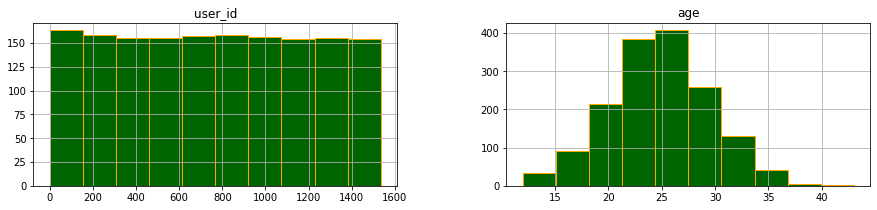

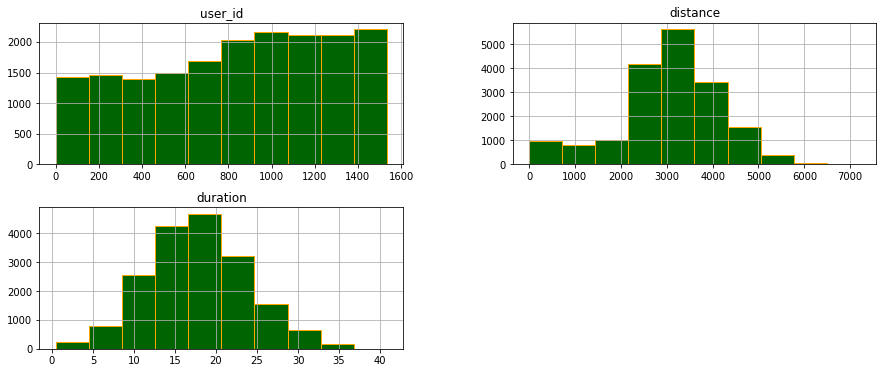

In [7]:
data_users.hist(figsize=(15, 3), color = 'darkgreen', edgecolor = 'orange')
data_rides.hist(figsize=(15, 6), color = 'darkgreen', edgecolor = 'orange')
plt.show()

<div class="alert alert-secondary" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b>Вывод по блоку 'Загрузка данных' :</b> 
    
  
    Есть 3 таблицы:  
    - Первая (data_users) с данными по клиентам (user_id - уникальный идентификатор пользователя, name - имя пользователя, age - возраст, city - город, subscription_type - тип подписки (free, ultra)).
    - Вторая (data_rides) c данными по поездкам (user_id - уникальный идентификатор пользователя, distance - расстояние, которое пользователь проехал в текущей сессии (в метрах), duration - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку», date - дата совершения поездки).  
    - Третья (data_subscriptions) с данными по подпискам (subscription_type - тип подписки, minute_price - стоимость одной минуты поездки по данной подписке, start_ride_price - стоимость начала поездки, subscription_fee - стоимость ежемесячного платежа).
      
    Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться: 
    
    без подписки  
    абонентская плата отсутствует;  
    стоимость одной минуты поездки — 8 рублей;  
    стоимость старта (начала поездки) — 50 рублей;  
  
    с подпиской Ultra  
    абонентская плата — 199 рублей в месяц;  
    стоимость одной минуты поездки — 6 рублей;  
    стоимость старта — бесплатно. 
      
    Пропусков в данных нет, это радует. Распределения нормальные, явных аномалий пока не вижу, посмотрим внимательнее в следующем разделе.
</div>

#### Шаг 2. Предобработка данных

**Рассмотрим data_users:**

In [8]:
data_users.isnull().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

Пропусков нет, посмотрим дубликаты:

In [9]:
data_users.duplicated().sum()

31

In [10]:
data_users.value_counts().head(31)

user_id  name        age  city            subscription_type
209      Андрей      23   Омск            ultra                2
807      Александр   28   Екатеринбург    free                 2
611      Владимир    28   Омск            ultra                2
43       Стефания    22   Омск            ultra                2
737      Мелания     27   Ростов-на-Дону  free                 2
47       Юрий        28   Тюмень          ultra                2
1198     Демид       29   Ростов-на-Дону  free                 2
829      Федор       29   Пятигорск       free                 2
924      Мария       23   Пятигорск       free                 2
153      Герман      23   Москва          ultra                2
635      Герман      21   Москва          ultra                2
72       Никита      25   Москва          ultra                2
909      Константин  20   Екатеринбург    free                 2
908      Рустам      30   Тюмень          free                 2
136      Марсель     25   Тюме

Удалим явные дубликаты:

In [11]:
data_users = data_users.drop_duplicates()
data_users.duplicated().sum()

0

Проверим неявные в столбцах с именем и названием города:

In [12]:
data_users['name'].unique()

array(['Кира', 'Станислав', 'Алексей', 'Константин', 'Адель', 'Регина',
       'Игорь', 'Юрий', 'Ян', 'Валерий', 'Агата', 'Марк', 'Ева',
       'Антонина', 'Валерия', 'Амалия', 'Даниил', 'Аделина', 'Святогор',
       'Борис', 'Вероника', 'Ростислав', 'Назар', 'Эдуард', 'Василий',
       'Денис', 'Тамара', 'Николай', 'Эвелина', 'Федор', 'Руслан', 'Иван',
       'Любовь', 'Ярослава', 'Майя', 'Ильдар', 'Данила', 'Нина',
       'Стефания', 'Ясмина', 'Дмитрий', 'Александр', 'Одиссей', 'Арсений',
       'Алла', 'Таисия', 'Максим', 'Юлиана', 'Павел', 'Карина', 'Алиса',
       'Лидия', 'Рамиль', 'Родион', 'Ника', 'Оксана', 'Анастасия',
       'Маргарита', 'Вера', 'Тимур', 'Никита', 'Лев', 'Влад', 'Артур',
       'Анна', 'Ольга', 'Вячеслав', 'Ксения', 'Виталина', 'Владислав',
       'Тамерлан', 'Амина', 'Вадим', 'Олеся', 'Зарина', 'Егор', 'Гордей',
       'Лилия', 'Святослав', 'Роберт', 'Амир', 'Влада', 'Богдан',
       'Полина', 'Марат', 'Елисей', 'Макар', 'Алина', 'Глеб', 'Андрей',
       'Ал

In [13]:
data_users['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

Всё ок, переходим к следующей таблице.

**Рассмотрим data_rides:**

In [14]:
data_rides.isnull().sum()

user_id     0
distance    0
duration    0
date        0
dtype: int64

Пропусков нет, посмотрим дубликаты:

In [15]:
data_rides.duplicated().sum()

0

Явных дубликатов нет.

In [16]:
data_rides['user_id'].value_counts()

1236    27
783     26
1063    26
1204    24
1149    23
        ..
420      3
108      3
412      3
342      2
366      2
Name: user_id, Length: 1534, dtype: int64

Количество пользователей практически совпадает с первой таблицей.

Удаляем аномальные значение (пик около 0):

In [17]:
data_rides = data_rides[data_rides.duration > 1] 
data_rides.describe()

,user_id,distance,duration
count,17973.000000,17973.000000,17973.000000
mean,841.551995,3059.863833,17.896480
std,435.144929,1108.814612,5.975424
min,1.000000,0.855683,2.035632
25%,484.000000,2538.839628,13.670439
50%,887.000000,3129.029255,17.714122
75%,1213.000000,3762.636244,21.747016
max,1534.000000,7066.003772,40.823963


**C data_subscriptions всё в порядке.**

**Приведём столбец date к типу даты pandas.**

In [18]:
data_rides['date'] = pd.to_datetime(data_rides['date'], format = '%Y-%m-%d')
data_rides['date'].head()

0   2021-01-01
1   2021-01-18
2   2021-04-20
3   2021-08-11
4   2021-08-28
Name: date, dtype: datetime64[ns]

**Создадим новый столбец с номером месяца на основе столбца date.**

In [19]:
data_rides['date_month'] = pd.DatetimeIndex(data_rides['date']).month
data_rides['date_month'].head()

0    1
1    1
2    4
3    8
4    8
Name: date_month, dtype: int64

In [20]:
print(data_rides['date'].min())
print(data_rides['date'].max())

2021-01-01 00:00:00
2021-12-30 00:00:00


В таблице данные за весь 2021 год.

<div class="alert alert-secondary" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b>Вывод по блоку 'Предобработка данных' :</b> 
    
  
    Убрали явные дубликаты в таблице data_users, проверили неявные в имени пользователей и наименовании городов. 
    В таблицах data_rides и data_subscriptions всё хорошо.
    Привели столбец date к типу данных pandas.
    Создали новый столбец с номером месяца на основе столбца date.
</div>

#### Шаг 3. Исследовательский анализ данных

Опишем и визуализируем общую информацию о пользователях и поездках:

**Частота встречаемости городов.**

In [21]:
#data_users['city'].hist(bins=50, figsize=(15,5), color = 'darkgreen', edgecolor = 'orange')

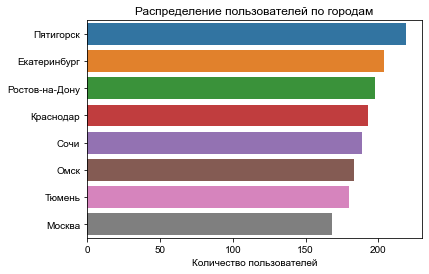

,city,name
0,Пятигорск,219
1,Екатеринбург,204
2,Ростов-на-Дону,198
3,Краснодар,193
4,Сочи,189
5,Омск,183
6,Тюмень,180
7,Москва,168


In [22]:
data_users_city = data_users.groupby(['city']).agg({'name':'count'}).sort_values(by='name', ascending=False).reset_index()
sns.barplot(x="name", y="city", data=data_users_city)
sns.set_theme(style = 'darkgrid', palette = 'pastel')
plt.xlabel("Количество пользователей")
plt.ylabel("")
plt.title("Распределение пользователей по городам")
plt.show()
data_users_city

**Вывод:** Пользователи по городам распределены практически равномерно, лидирует - Пятигорск.

**Соотношение пользователей с подпиской и без подписки.**

<AxesSubplot:title={'center':'Соотношение пользователей с подпиской и без подписки'}>

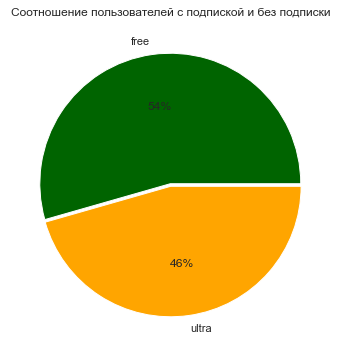

In [23]:
mycolors = ["darkgreen", "orange"]
data_users['subscription_type'].value_counts().plot(ylabel='', kind='pie', explode=[0, 0.02], figsize=(6, 6), title='Соотношение пользователей с подпиской и без подписки', colors = mycolors, autopct='%1.0f%%')

**Вывод:** Пользователей без подписки немного больше.

**Возраст пользователей.**

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

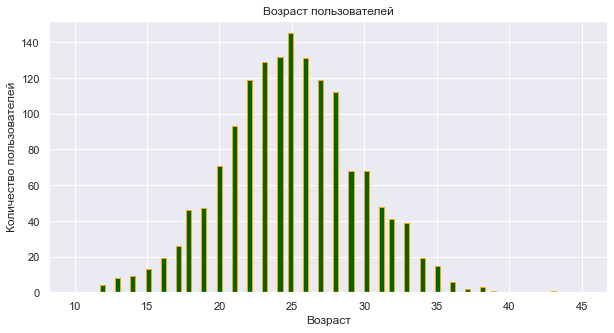

In [24]:
data_users.plot(y='age', kind='hist', bins=100, grid=True, figsize=(10,5), range=(10,45), title='Возраст пользователей', color = 'darkgreen', edgecolor = 'orange', legend = False)
plt.xlabel("Возраст")
plt.ylabel("Количество пользователей")
data_users['age'].describe()

**Вывод:** Чаще всего приложением пользуются пользователи в возрасте от 22 до 28 лет.

**Расстояние, которое пользователь преодолел за одну поездку.**

Text(0, 0.5, 'Количество поездок')

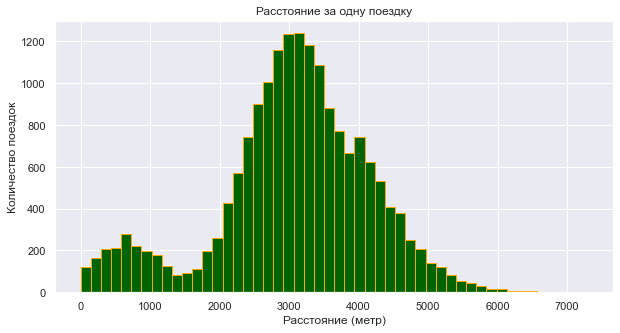

In [25]:
data_rides.plot(y='distance', kind='hist', bins=50, grid=True, figsize=(10,5), range=(0,7300), title='Расстояние за одну поездку', color = 'darkgreen', edgecolor = 'orange', legend = False)
data_rides['distance'].describe()
plt.xlabel("Расстояние (метр)")
plt.ylabel("Количество поездок")

**Вывод:** Чаще всего, пользователи проезжают расстояние ~3 км.

**Продолжительность поездок.**

Text(0, 0.5, 'Количество поездок')

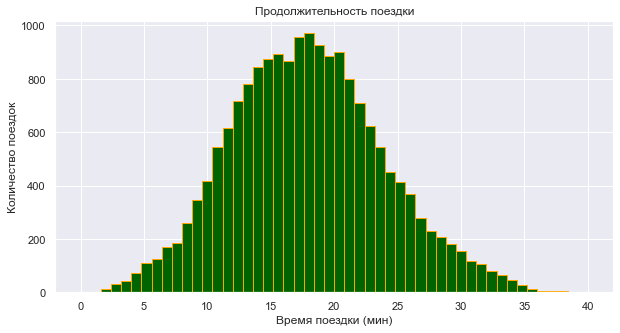

In [26]:
data_rides.plot(y='duration', kind='hist', bins=50, grid=True, figsize=(10,5), range=(0,40), title='Продолжительность поездки', color = 'darkgreen', edgecolor = 'orange', legend = False)
data_rides['duration'].describe()
plt.xlabel("Время поездки (мин)")
plt.ylabel("Количество поездок")

In [27]:
#data_rides_0 = data_rides.query('duration <= 1')
#data_rides_0.describe()

**Вывод:** В среднем, пользователи используют самокат от 13 до 21 минуты.

<div class="alert alert-secondary" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b>Вывод по блоку 'Исследовательский анализ данных' :</b> 
    
  
    Пользователи практически равномерно распределены по городам, большая часть пользуется приложением без подписки. Возраст, в среднем, варьируется от 22 до 28 лет. Так же, выявили, что в среднем, пользователи используют самокат от 13 до 21 минут и проезжают расстояние ~ в 3 км.
</div>

#### Шаг 4. Объединение данных

Объединим данные о пользователях, поездках и подписках в один датафрейм. 

In [28]:
data_full = data_users.merge(data_rides, on='user_id')
data_full = data_full.merge(data_subscriptions, on='subscription_type')
data_full['duration'] = np.ceil(data_full['duration'])
data_full.describe()

,user_id,age,distance,duration,date_month,minute_price,start_ride_price,subscription_fee
count,17973.000000,17973.000000,17973.000000,17973.000000,17973.000000,17973.000000,17973.000000,17973.000000
mean,841.551995,24.890169,3059.863833,18.394981,6.486786,7.276693,31.917320,71.969065
std,435.144929,4.583348,1108.814612,5.979419,3.436024,0.960985,24.024629,95.618023
min,1.000000,12.000000,0.855683,3.000000,1.000000,6.000000,0.000000,0.000000
25%,484.000000,22.000000,2538.839628,14.000000,4.000000,6.000000,0.000000,0.000000
50%,887.000000,25.000000,3129.029255,18.000000,6.000000,8.000000,50.000000,0.000000
75%,1213.000000,28.000000,3762.636244,22.000000,9.000000,8.000000,50.000000,199.000000
max,1534.000000,43.000000,7066.003772,41.000000,12.000000,8.000000,50.000000,199.000000


In [29]:
print(data_rides['user_id'].count()) #сравним кол-во строк до и после объединения
data_full['user_id'].count()

17973


17973

In [30]:
data_full.head()

,user_id,name,age,city,subscription_type,distance,duration,date,date_month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26.0,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16.0,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,7.0,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19.0,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,27.0,2021-08-28,8,6,0,199


Cоздадим ещё два датафрейма:  
- c данными о пользователях без подписки;
- с данными о пользователях с подпиской.

In [31]:
data_full_free = data_full.loc[data_full['subscription_type'] == 'free']
data_full_ultra = data_full.loc[data_full['subscription_type'] == 'ultra']

In [32]:
data_full_free.head()

,user_id,name,age,city,subscription_type,distance,duration,date,date_month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,15.0,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,17.0,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,21.0,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,10.0,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,18.0,2021-02-14,2,8,50,0


In [33]:
data_full_ultra.head()

,user_id,name,age,city,subscription_type,distance,duration,date,date_month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26.0,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16.0,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,7.0,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19.0,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,27.0,2021-08-28,8,6,0,199


Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.

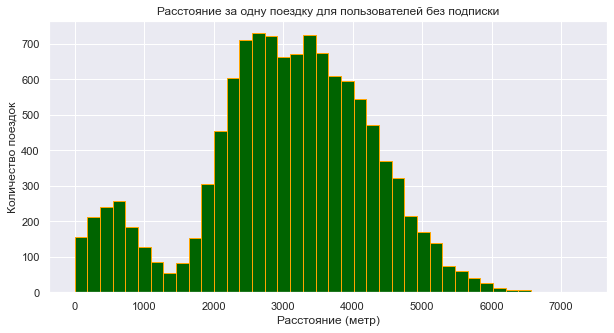

count    11473.000000
mean      3028.374239
std       1235.541051
min          0.855683
25%       2360.878149
50%       3102.083025
75%       3883.979311
max       7066.003772
Name: distance, dtype: float64


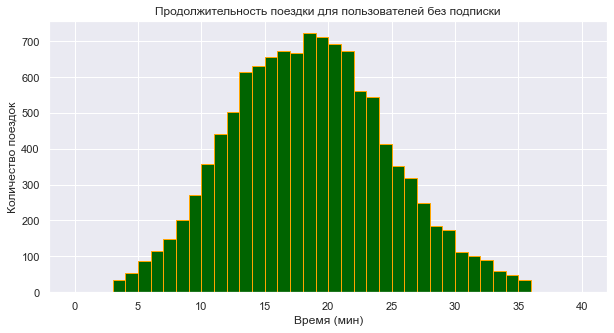

count    11473.000000
mean        18.030855
std          6.166175
min          3.000000
25%         14.000000
50%         18.000000
75%         22.000000
max         35.000000
Name: duration, dtype: float64


In [34]:
data_full_free.plot(y='distance', kind='hist', bins=40, grid=True, figsize=(10,5), range=(0,7300), title='Расстояние за одну поездку для пользователей без подписки', color = 'darkgreen', edgecolor = 'orange', legend = False)
plt.xlabel("Расстояние (метр)")
plt.ylabel("Количество поездок")
plt.show()
print(data_full_free['distance'].describe())
data_full_free.plot(y='duration', kind='hist', bins=40, grid=True, figsize=(10,5), range=(0,40), title='Продолжительность поездки для пользователей без подписки', color = 'darkgreen', edgecolor = 'orange', legend = False)
plt.xlabel("Время (мин)")
plt.ylabel("Количество поездок")
plt.show()
print(data_full_free['duration'].describe())

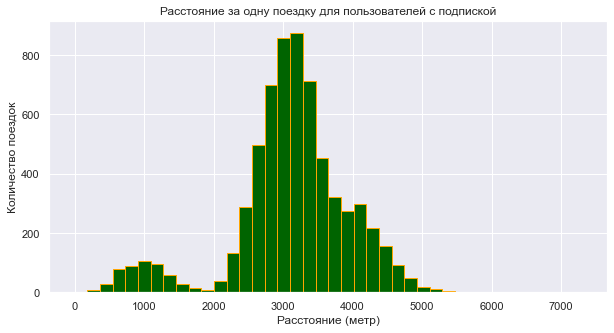

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64


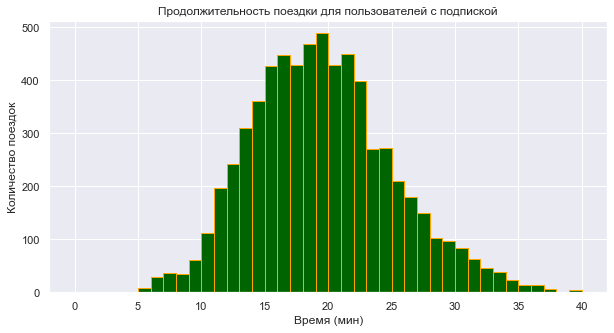

count    6500.000000
mean       19.037692
std         5.577439
min         4.000000
25%        15.000000
50%        19.000000
75%        22.000000
max        41.000000
Name: duration, dtype: float64


In [35]:
data_full_ultra.plot(y='distance', kind='hist', bins=40, grid=True, figsize=(10,5), range=(0,7300), title='Расстояние за одну поездку для пользователей с подпиской', color = 'darkgreen', edgecolor = 'orange', legend = False)
plt.xlabel("Расстояние (метр)")
plt.ylabel("Количество поездок")
plt.show()
print(data_full_ultra['distance'].describe())
data_full_ultra.plot(y='duration', kind='hist', bins=40, grid=True, figsize=(10,5), range=(0,40), title='Продолжительность поездки для пользователей с подпиской', color = 'darkgreen', edgecolor = 'orange', legend = False)
plt.xlabel("Время (мин)")
plt.ylabel("Количество поездок")
plt.show()
print(data_full_ultra['duration'].describe())

<div class="alert alert-secondary" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b>Вывод по блоку 'Объединение данных' :</b> 
    
  
    Объединили все 3 таблицы в одну. Сравнили расстояние и продолжительность поездок для пользователей с подпиской и без. Существенной разницы нет, пользователи с подпиской имеют чуть больший разброс в продолжительности поездок, пользователи же без подписки, в среднем, используют самокат чуть дольше.
</div>

#### Шаг 5. Подсчёт выручки

Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдём суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [36]:
data_full_group = data_full.groupby(['user_id', 'date_month', 'subscription_type', 'minute_price', 'start_ride_price', 'subscription_fee']).agg({'duration':'sum', 'distance':'sum', 'name':'count'}).reset_index()
data_full_group.head()

,user_id,date_month,subscription_type,minute_price,start_ride_price,subscription_fee,duration,distance,name
0,1,1,ultra,6,0,199,42.0,7027.511294,2
1,1,4,ultra,6,0,199,7.0,754.159807,1
2,1,8,ultra,6,0,199,46.0,6723.470560,2
3,1,10,ultra,6,0,199,32.0,5809.911100,2
4,1,11,ultra,6,0,199,56.0,7003.499363,3


В этот же датафрейм добавим столбец с помесячной выручкой, которую принёс каждый пользователь.

In [37]:
data_full_group['monthly_revenue'] = data_full_group['start_ride_price'] * data_full_group['name'] + data_full_group['minute_price'] * data_full_group['duration'] + data_full_group['subscription_fee']
data_full_group.sort_values(by='monthly_revenue', ascending=False).head()

,user_id,date_month,subscription_type,minute_price,start_ride_price,subscription_fee,duration,distance,name,monthly_revenue
10762,1471,1,free,8,50,0,143.0,23098.193122,6,1444.0
7606,1083,5,free,8,50,0,129.0,23429.487786,7,1382.0
4659,715,12,free,8,50,0,131.0,22712.450389,6,1348.0
10387,1424,4,free,8,50,0,124.0,21527.849820,7,1342.0
10047,1383,1,free,8,50,0,123.0,20653.334199,6,1284.0


In [38]:
data_full_group['monthly_revenue'].describe()

count    11300.000000
mean       342.754956
std        153.317314
min         74.000000
25%        234.000000
50%        319.000000
75%        415.000000
max       1444.000000
Name: monthly_revenue, dtype: float64

<div class="alert alert-secondary" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b>Вывод по блоку 'Подсчёт выручки' :</b> 
    
  
    Сгрупировали данные для каждого пользователя за каждый месяц и посчитали суммарное расстояние, количество поездок и суммарное время. На основании этих данных рассчитали помесячную выручку для каждого пользователя. Максимальное значение составило 1444 руб.
</div>

#### Шаг 6. Проверка гипотез

Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.

- Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

Сформулируем нулевую и альтернативную гипотезы:  
Н0 - У пользователей с подпиской среднее время поездки такое же как у пользователей без подписки.   
Н1 - У пользователей с подпиской среднее время поездки больше чем у пользователей без подписки.

In [39]:
alpha = 0.05

results = st.ttest_ind(data_full_ultra['duration'], data_full_free['duration'], alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 8.577910347796266e-28
Отвергаем нулевую гипотезу


In [40]:
print(data_full_ultra['duration'].mean(), data_full_free['duration'].mean()) #выведем среднее значение продолжительности поездок для каждой категории пользователей

19.037692307692307 18.030855050989278


**Вывод:** Нулевая гипотеза не подтверждается, у пользователей с подпиской среднее время поездки больше чем у пользователей без подписки.

- Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.

Сформулируем нулевую и альтернативную гипотезы:  
Н0 - Пользователи с подпиской в среднем проезжают расстояние равное 3130 метров.   
Н1 - Пользователи с подпиской в среднем проезжают расстояние больше чем 3130 метров. 

In [41]:
alpha = 0.05
optimal_distance = 3130

results = st.ttest_1samp(data_full_ultra['distance'], optimal_distance, alternative='greater')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

p-значение: 0.9195368847849785
Не отвергаем нулевую гипотезу


**Вывод:** Гипотеза подтверждается, расстояние которое проезжают пользователи с подпиской, в среднем, не превышает 3130 метров.

- Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.

Сформулируем гипотезы:  
Н0 - Помесячная выручка от пользвателей с подпиской равна выручке от пользователей без подписки.  
Н1 - Помесячная выручка от пользвателей с подпиской выше чем выручка от пользователей без подписки.  

In [42]:
alpha = 0.05 

sample_1 = data_full_group.query('subscription_type == "ultra"')['monthly_revenue']
sample_2 = data_full_group.query('subscription_type == "free"')['monthly_revenue']

results = st.ttest_ind(sample_1, sample_2, alternative = 'greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 2.0314113674863288e-30
Отвергаем нулевую гипотезу


In [43]:
print('Значение средней выручки для пользователей с подпиской:', data_full_group.query('subscription_type == "ultra"')['monthly_revenue'].mean())
print('Значение средней выручки для пользователей без подписки:', data_full_group.query('subscription_type == "free"')['monthly_revenue'].mean())

Значение средней выручки для пользователей с подпиской: 362.7921906022502
Значение средней выручки для пользователей без подписки: 329.3326437121324


**Вывод:** Гипотеза подтверждается, помесячная выручка от пользователей с подпиской выше чем от пользователей без подписки.

- Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

**Ответ:** Для проверки этой гипотезы понадобится метод: **scipy.stats.ttest_rel** (О равенстве среднего значения генеральной совокупности до и после изменения).

<div class="alert alert-secondary" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b>Вывод по блоку 'Проверка гипотез' :</b> 
    
  
    Проверили 3 гипотезы:
    - Пользователи с подпиской не тратят больше времени на поездки, чем пользователи без подписки.
    - Расстояние которое проезжают пользователи с подпиской, в среднем, не приевышает 3130 метров.
    - Помесячная выручка от пользователей с подпиской выше чем от пользователей без подписки.
</div>

#### Шаг 7. Распределения

<div class="alert alert-secondary" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b>Вывод :</b> 
    
  
    Дедлайн по сборному проекту близко, пока нет времени. Потом вернусь к этому необязательному заданию.
</div>

<div class="alert alert-secondary" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b>Итоговый вывод исследования популярного сервиса аренды самокатов GoFast:</b> 
    
  
На основании переданных нам данных о пользователях из нескольких городов, а также об их поездках был проведён анализ данных и проверка некоторых гипотез, которые могут помочь популярному сервису аренды самокатов GoFast вырасти.
  
Было полученно 3 таблицы: 
- Первая с данными по клиентам.
- Вторая c данными по поездкам.
- Третья с данными по подпискам.

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться: 

без подписки  
абонентская плата отсутствует;  
стоимость одной минуты поездки — 8 рублей;  
стоимость старта (начала поездки) — 50 рублей;  

с подпиской Ultra  
абонентская плата — 199 рублей в месяц;  
стоимость одной минуты поездки — 6 рублей;  
стоимость старта — бесплатно. 

На этапе 'Предобработка данных' :  
Убрали явные дубликаты в таблице data_users, проверили неявные в имени пользователей и наименовании городов. 
Привели столбец date к типу данных pandas.
Создали новый столбец с номером месяца на основе столбца date.
  
На этапе 'Исследовательский анализ данных' выявили что:  
Пользователи практически равномерно распределены по городам, большая часть пользуется приложением без подписки. Возраст, в среднем, варьируется от 22 до 28 лет. Так же, выявили, что в среднем, пользователи используют самокат от 13 до 21 минут и проезжают расстояние ~ в 3 км.  
    
На этапе 'Объединение данных' :  
Объединили все 3 таблицы в одну. Сравнили расстояние и продолжительность поездок для пользователей с подпиской и без. Существенной разницы нет, пользователи с подпиской имеют чуть больший разброс в продолжительности поездок, пользователи же без подписки, в среднем, используют самокат чуть дольше.  
    
На этапе 'Подсчёт выручки' :  
Сгрупировали данные для каждого пользователя за каждый месяц и посчитали суммарное расстояние, количество поездок и суммарное время. На основании этих данных рассчитали помесячную выручку для каждого пользователя. Максимальное значение составило 1444 руб. 
    
На этапе 'Проверка гипотез' :  
Проверили 3 гипотезы:
- У пользователей с подпиской, в среднем, время поездки больше чем у пользователей без подписки.
- Расстояние которое проезжают пользователи с подпиской, в среднем, не приевышает 3130 метров.
- Помесячная выручка от пользователей с подпиской выше чем от пользователей без подписки.

</div>